# Import Libraries and Verify Earth Engine Works

# Get City Images

In [4]:
from get_photos import *
# from SatalliteClassifier import *


In [5]:
# import ee
# import geopy
# from geopy.geocoders import Nominatim
# from PIL import Image
# import requests
# from io import BytesIO
# import math
# import os
# # ee.Initialize(project='gthack25')
# # print(ee.String('Hello from the Earth Engine servers!').getInfo())

# def get_city_coordinates(city_name):
#     # INPUTS: CITY NAME
#     # OUTPUT: LAT AND LONG
#     geolocator = Nominatim(user_agent="city_locator")
#     location = geolocator.geocode(city_name)
#     return location.latitude, location.longitude

# # Function to get satellite image of a specific region using USDA/NAIP/DOQQ dataset
# #.003625  = .25
# def retrieve_naip_image(lat, long, date2, deltalr=0.0058, deltaud=0.0058, date1='2018-01-01'):
#     """
#     INPUTS: 
#         LATITUDE
#         LONGITUDE
#         DATE2 - END DATE
#         DATE1 - START DATE
#         DELTALR - HALFWIDTH OF REGION LEFT TO RIGHT IN DEGREES (STRETCH THESE SO THE RADIUS IS A .5 MILE OR A MILE)
#         DELTAUD - HALFWIDTH OF REGION TOP TO BOTTOM IN DEGREES
#     OUTPUTS: IMAGE DATA
#     """
#     #CREATE A BOUNDING BOX FOR IMAGE (WOULD PROBABLY MESS WITH THIS TO ENFORCE A SHAPE)
#     region = ee.Geometry.BBox(long - deltalr, lat - deltaud, long + deltalr, lat + deltaud)
#     #SLICE IMAGE CLOSEST OT DATE 1 AND AND WITHIN SHAPE OF BOUNDING BOX
#     dataset = ee.ImageCollection('USDA/NAIP/DOQQ') \
#         .filter(ee.Filter.date(date1, date2)) \
#         .filter(ee.Filter.bounds(region))
#     return dataset

# def save_image_from_url(url, filename):
#     #SAVE IMAGE DATA TO PNG
#     response = requests.get(url)
#     if response.status_code == 200:
#         image = Image.open(BytesIO(response.content))
#         image.save(filename)
#         # print(f"Satellite image saved as {filename}")
#     else:
#         print("Error fetching the satellite image.")

# def capture_gee_images(city_lat, city_lon, date1='2018-01-01', date2='2025-02-22', 
#                         deltalr=0.0145, deltaud=0.0145, miles_range=10):
#     """
#     Captures a grid of high quality satellite images from the provided Google Earth dataset.
#     This uses the USDA/NAIP/DOQQ dataset available in Earth Engine.

#     The grid is generated by using the provided deltalr and deltaud as half-widths (in degrees)
#     for each image's bounding box, and covers a 15-mile radius around the city center.

#     Each image is exported as a 1024x1024 PNG and saved in the "data" folder with filenames reflecting 
#     their grid position.

#     INPUTS:
#       city_lat, city_lon   - Center coordinates of the city.
#       date1                - Start date for filtering the image collection.
#       date2                - End date for filtering the image collection.
#       deltalr              - Half-width in longitude degrees for each image.
#       deltaud              - Half-height in latitude degrees for each image.
#       miles_range          - Radius in miles to cover around the city center.
#     """
#     # Create data directory if it does not exist
#     data_dir = "data"
#     os.makedirs(data_dir, exist_ok=True)
    
#     # Conversion: 1 degree latitude is approximately 69 miles.
#     half_extent_lat = miles_range / 69.0
#     # Longitude degrees vary with latitude.
#     half_extent_lon = miles_range / (69.0 * math.cos(math.radians(city_lat)))
    
#     # Number of images needed in latitude and longitude directions.
#     # Each image covers 2*deltaud degrees in latitude and 2*deltalr degrees in longitude.
#     num_rows = math.ceil((2 * half_extent_lat) / (2 * deltaud))
#     num_cols = math.ceil((2 * half_extent_lon) / (2 * deltalr))
    
#     # Calculate starting coordinates (bottom-left of the grid)
#     start_lat = city_lat - half_extent_lat
#     start_lon = city_lon - half_extent_lon
    
#     print(f"Capturing a grid of {num_rows} rows x {num_cols} columns of images using the Google Earth dataset...")
    
#     for row in range(num_rows):
#         for col in range(num_cols):
#             # Compute the center coordinate for the current grid cell.
#             cell_center_lat = start_lat + (row * 2 * deltaud) + deltaud
#             cell_center_lon = start_lon + (col * 2 * deltalr) + deltalr
            
#             # Define the region for the image as a bounding box around the cell center.
#             region = ee.Geometry.BBox(cell_center_lon - deltalr, cell_center_lat - deltaud,
#                                       cell_center_lon + deltalr, cell_center_lat + deltaud)
            
#             # Retrieve the image collection for the cell area using the provided dataset function.
#             dataset = retrieve_naip_image(cell_center_lat, cell_center_lon, date2, deltalr, deltaud, date1)
#             # Choose the first available image from the collection.
#             image = dataset.first()
            
#             # Select only the first three bands (typically representing RGB) to avoid encoding issues.
#             image = image.select([0, 1, 2])
            
#             # Set thumbnail parameters for a 1024x1024 image in PNG format.
#             thumb_params = {
#                 'region': region, 
#                 'dimensions': '1024x1024', 
#                 'format': 'png'
#             }
#             try:
#                 image_url = image.getThumbURL(thumb_params)
#             except Exception as e:
#                 print(f"Error generating thumbnail URL for cell at row {row}, col {col}: {e}")
#                 continue
            
#             # Generate a filename based on grid row and column.
#             filename = os.path.join(data_dir, f"gee_image_row{row}_col{col}.png")
            
#             #print(f"Fetching image at lat: {cell_center_lat:.6f}, lon: {cell_center_lon:.6f}")
#             save_image_from_url(image_url, filename)

In [6]:
# def get_city_coordinates(city_name):
#     # INPUTS: CITY NAME
#     # OUTPUT: LAT AND LONG
#     geolocator = Nominatim(user_agent="city_locator")
#     location = geolocator.geocode(city_name)
#     return location.latitude, location.longitude

# # Function to get satellite image of a specific region using USDA/NAIP/DOQQ dataset
# #.003625  = .25
# def retrieve_naip_image(lat, long, date2, deltalr=0.0058, deltaud=0.0058, date1='2018-01-01'):
#     """
#     INPUTS: 
#         LATITUDE
#         LONGITUDE
#         DATE2 - END DATE
#         DATE1 - START DATE
#         DELTALR - HALFWIDTH OF REGION LEFT TO RIGHT IN DEGREES (STRETCH THESE SO THE RADIUS IS A .5 MILE OR A MILE)
#         DELTAUD - HALFWIDTH OF REGION TOP TO BOTTOM IN DEGREES
#     OUTPUTS: IMAGE DATA
#     """
#     #CREATE A BOUNDING BOX FOR IMAGE (WOULD PROBABLY MESS WITH THIS TO ENFORCE A SHAPE)
#     region = ee.Geometry.BBox(long - deltalr, lat - deltaud, long + deltalr, lat + deltaud)
#     #SLICE IMAGE CLOSEST OT DATE 1 AND AND WITHIN SHAPE OF BOUNDING BOX
#     dataset = ee.ImageCollection('USDA/NAIP/DOQQ') \
#         .filter(ee.Filter.date(date1, date2)) \
#         .filter(ee.Filter.bounds(region))
#     return dataset

# def save_image_from_url(url, filename):
#     #SAVE IMAGE DATA TO PNG
#     response = requests.get(url)
#     if response.status_code == 200:
#         image = Image.open(BytesIO(response.content))
#         image.save(filename)
#         # print(f"Satellite image saved as {filename}")
#     else:
#         print("Error fetching the satellite image.")

# #Function to get satellite image of a city
# def get_satellite_image(city_name, range_miles, date1='2018-01-01', date2='2025-02-22'):
#     # Convert range from miles to meters (1 mile = 1609.34 meters)
#     range_meters = range_miles * 1609.34
    
#     # Get coordinates of the city
#     latitude, longitude = get_city_coordinates(city_name)
    
#     # Define the region of interest
#     point = ee.Geometry.Point([longitude, latitude])
#     region = point.buffer(range_meters).bounds()
    
#     # Retrieve the satellite image from USDA/NAIP/DOQQ dataset
#     dataset = retrieve_naip_image(latitude, longitude, date2, date1=date1)
#     image = dataset.sort('system:time_start', False).first().clip(region)
    
#     # Get the URL for the image
#     url = image.getThumbURL({
#         'min': 0,
#         'max': 255,
#         'dimensions': '1024x1024',
#         'region': region,
#         'format': 'png'
#     })
    
#     # Fetch and save the image
#     response = requests.get(url)
#     if response.status_code == 200:
#         image = Image.open(BytesIO(response.content))
#         image.save("satellite_image.png")
#         print("Satellite image saved as satellite_image.png")
#     else:
#         print("Error fetching the satellite image.")
    
#     return image


# # Function to get and save multiple satellite images of a city area
# def get_multiple_satellite_images(city_name, date1='2018-01-01', date2='2025-02-22', step_miles=1):
#     # Convert step size from miles to degrees (approximation: 1 mile ≈ 0.0145 degrees)
#     step_degrees = step_miles * 0.0145
    
#     # Get coordinates of the city
#     latitude, longitude = get_city_coordinates(city_name)
    
#     # Define the range for sliding over the area (5 miles in each direction from the center)
#     range_miles = 15
#     range_degrees = range_miles * 0.0145
    
#     # Loop over the area and take multiple images
#     num_steps = math.ceil(range_degrees / step_degrees)
#     for i in range(-num_steps, num_steps + 1):
#         for j in range(-num_steps, num_steps + 1):
#             lat = latitude + i * step_degrees
#             long = longitude + j * step_degrees
#             dataset = retrieve_naip_image(lat, long, date2, date1=date1)
#             image = dataset.sort('system:time_start', False).first().clip(ee.Geometry.Point([long, lat]).buffer(1609.34))
#             url = image.getThumbURL({
#                 'min': 0,
#                 'max': 255,
#                 'dimensions': '1024x1024',
#                 'region': ee.Geometry.Point([long, lat]).buffer(1609.34).bounds(),
#                 'format': 'png'
#             })
#             filename = f"CLIPPED_DATA/satellite_image_{i}_{j}.png"
#             save_image_from_url(url, filename)

In [7]:
# city_name = "Charleston, SC"
# range_miles = 1

# # Get the satellite image
# satellite_image = get_satellite_image(city_name, range_miles)

# # Display the image (for visualization purposes)
# satellite_image.show()

In [8]:
# # Define the city
# city_name = "Tulsa, OK"

# # Get and save multiple satellite images
# get_multiple_satellite_images(city_name)

In [9]:
# def capture_gee_images(city_lat, city_lon, date1='2018-01-01', date2='2025-02-22', 
#                         deltalr=0.0145, deltaud=0.0145, miles_range=10):
#     """
#     Captures a grid of high quality satellite images from the provided Google Earth dataset.
#     This uses the USDA/NAIP/DOQQ dataset available in Earth Engine.

#     The grid is generated by using the provided deltalr and deltaud as half-widths (in degrees)
#     for each image's bounding box, and covers a 15-mile radius around the city center.

#     Each image is exported as a 1024x1024 PNG and saved in the "data" folder with filenames reflecting 
#     their grid position.

#     INPUTS:
#       city_lat, city_lon   - Center coordinates of the city.
#       date1                - Start date for filtering the image collection.
#       date2                - End date for filtering the image collection.
#       deltalr              - Half-width in longitude degrees for each image.
#       deltaud              - Half-height in latitude degrees for each image.
#       miles_range          - Radius in miles to cover around the city center.
#     """
#     # Create data directory if it does not exist
#     data_dir = "data"
#     os.makedirs(data_dir, exist_ok=True)
    
#     # Conversion: 1 degree latitude is approximately 69 miles.
#     half_extent_lat = miles_range / 69.0
#     # Longitude degrees vary with latitude.
#     half_extent_lon = miles_range / (69.0 * math.cos(math.radians(city_lat)))
    
#     # Number of images needed in latitude and longitude directions.
#     # Each image covers 2*deltaud degrees in latitude and 2*deltalr degrees in longitude.
#     num_rows = math.ceil((2 * half_extent_lat) / (2 * deltaud))
#     num_cols = math.ceil((2 * half_extent_lon) / (2 * deltalr))
    
#     # Calculate starting coordinates (bottom-left of the grid)
#     start_lat = city_lat - half_extent_lat
#     start_lon = city_lon - half_extent_lon
    
#     print(f"Capturing a grid of {num_rows} rows x {num_cols} columns of images using the Google Earth dataset...")
    
#     for row in range(num_rows):
#         for col in range(num_cols):
#             # Compute the center coordinate for the current grid cell.
#             cell_center_lat = start_lat + (row * 2 * deltaud) + deltaud
#             cell_center_lon = start_lon + (col * 2 * deltalr) + deltalr
            
#             # Define the region for the image as a bounding box around the cell center.
#             region = ee.Geometry.BBox(cell_center_lon - deltalr, cell_center_lat - deltaud,
#                                       cell_center_lon + deltalr, cell_center_lat + deltaud)
            
#             # Retrieve the image collection for the cell area using the provided dataset function.
#             dataset = retrieve_naip_image(cell_center_lat, cell_center_lon, date2, deltalr, deltaud, date1)
#             # Choose the first available image from the collection.
#             image = dataset.first()
            
#             # Select only the first three bands (typically representing RGB) to avoid encoding issues.
#             image = image.select([0, 1, 2])
            
#             # Set thumbnail parameters for a 1024x1024 image in PNG format.
#             thumb_params = {
#                 'region': region, 
#                 'dimensions': '1024x1024', 
#                 'format': 'png'
#             }
#             try:
#                 image_url = image.getThumbURL(thumb_params)
#             except Exception as e:
#                 print(f"Error generating thumbnail URL for cell at row {row}, col {col}: {e}")
#                 continue
            
#             # Generate a filename based on grid row and column.
#             filename = os.path.join(data_dir, f"gee_image_row{row}_col{col}.png")
            
#             #print(f"Fetching image at lat: {cell_center_lat:.6f}, lon: {cell_center_lon:.6f}")
#             save_image_from_url(image_url, filename)

# --------------------------
# Main function for demonstration
# --------------------------
# if __name__ == "__main__":
#     # Example usage:
#     # Replace with your actual city name.
#     city_name = "Tulsa, OK"
    
#     # Get the city's coordinates
#     try:
#         city_lat, city_lon = get_city_coordinates(city_name)
#     except Exception as e:
#         print("Error retrieving city coordinates:", e)
#         exit(1)
    
#     print(f"City coordinates for {city_name}: {city_lat}, {city_lon}")
    
#     # Capture images from the Google Earth dataset covering a 15-mile radius around the city center.
#     capture_gee_images(city_lat, city_lon, date1='2018-01-01', date2='2025-02-22', 
#                          deltalr=0.0058, deltaud=0.0058, miles_range=10)
#.00725 might be sweetspot

# Information Extraction 
Add any code that involves AI here

## Building Classifier


In [12]:
# import cv2
# import numpy as np

# def preprocess_image(image_path):
#     """
#     Load and preprocess the aerial image
#     """
#     # Load image in both color and grayscale
#     img_color = cv2.imread(image_path)
#     img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
#     if img_color is None:
#         raise ValueError("Image could not be loaded")
    
#     # Apply Gaussian blur to reduce noise
#     blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
#     # Adaptive thresholding for buildings
#     thresh = cv2.adaptiveThreshold(
#         blurred,
#         255,
#         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#         cv2.THRESH_BINARY_INV,
#         11,
#         2
#     )
    
#     return thresh, img_color, img_gray

# def detect_buildings(binary_img):
#     """
#     Detect buildings using contour detection
#     """
#     contours, _ = cv2.findContours(
#         binary_img,
#         cv2.RETR_EXTERNAL,
#         cv2.CHAIN_APPROX_SIMPLE
#     )
    
#     buildings = []
#     min_area = 100
#     max_area = 10000
    
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if min_area < area < max_area:
#             peri = cv2.arcLength(contour, True)
#             approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
#             if len(approx) >= 4:
#                 x, y, w, h = cv2.boundingRect(contour)
#                 aspect_ratio = float(w) / h
#                 if 0.2 < aspect_ratio < 5.0:
#                     buildings.append(contour)
    
#     return buildings

# def detect_woodlands(color_img):
#     """
#     Detect woodland patches based on green color
#     """
#     # Convert to HSV for better color detection
#     hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
    
#     # Define range for green color (woodlands)
#     lower_green = np.array([35, 40, 40])  # Adjust these values as needed
#     upper_green = np.array([85, 255, 255])
    
#     # Create mask for green areas
#     mask = cv2.inRange(hsv, lower_green, upper_green)
    
#     # Apply morphological operations to clean up
#     kernel = np.ones((5,5), np.uint8)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
#     # Find contours of woodland areas
#     contours, _ = cv2.findContours(
#         mask,
#         cv2.RETR_EXTERNAL,
#         cv2.CHAIN_APPROX_SIMPLE
#     )
    
#     woodlands = []
#     min_area = 200  # Minimum area for woodland patch
#     max_area = 50000  # Maximum area to avoid counting entire forests
    
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if min_area < area < max_area:
#             woodlands.append(contour)
    
#     return woodlands

# def visualize_results(original_img, buildings, woodlands, output_path="output.jpg"):
#     """
#     Draw detected buildings and woodlands on the original image
#     """
#     result_img = original_img.copy()
    
#     # Draw buildings in blue
#     cv2.drawContours(result_img, buildings, -1, (255, 0, 0), 2)
    
#     # Draw woodlands in green
#     cv2.drawContours(result_img, woodlands, -1, (0, 255, 0), 2)
    
#     # Add counts
#     building_count = len(buildings)
#     woodland_count = len(woodlands)
    
#     cv2.putText(
#         result_img,
#         f"Buildings: {building_count}",
#         (10, 30),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         1,
#         (255, 0, 0),
#         2
#     )
#     cv2.putText(
#         result_img,
#         f"Woodlands: {woodland_count}",
#         (10, 60),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         1,
#         (0, 255, 0),
#         2
#     )
    
#     cv2.imwrite(output_path, result_img)
#     return building_count, woodland_count

# def analyze_aerial_image(image_path):
#     """
#     Main function to count buildings and woodland patches
#     """
#     try:
#         # Preprocess the image
#         binary_img, color_img, gray_img = preprocess_image(image_path)
        
#         # Detect features
#         buildings = detect_buildings(binary_img)
#         woodlands = detect_woodlands(color_img)
        
#         # Visualize and get counts
#         building_count, woodland_count = visualize_results(color_img, buildings, woodlands)
        
#         return building_count, woodland_count
    
#     except Exception as e:
#         print(f"Error processing image: {str(e)}")
#         return -1, -1

# Example usage
# if __name__ == "__main__":
#     image_path = "data/gee_image_row0_col25.png"
#     buildings, woodlands = analyze_aerial_image(image_path)
#     print(f"Number of buildings detected: {buildings}")
#     print(f"Number of woodland patches detected: {woodlands}")
# folder_path = "data/"
# df_results = analyze_folder(folder_path)
# print(df_results)
# df_results.to_csv("analysis_results.csv", index=False)


Number of buildings detected: 132
Execution time: 0.05 seconds
Segmented image saved as: output_segmented.jpg


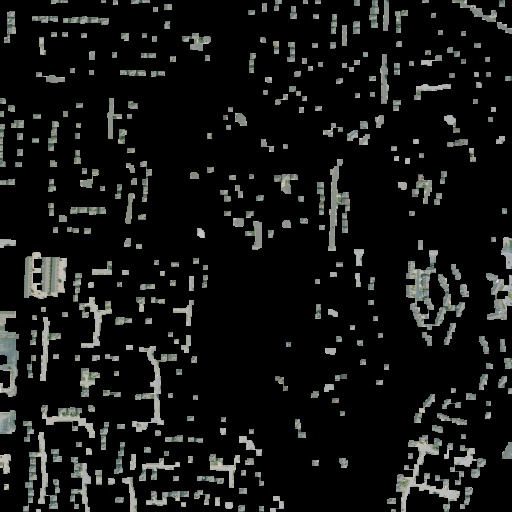

In [38]:
# import cv2
# import numpy as np
# import time
# from IPython.display import Image, display  # For displaying images in Jupyter

# def preprocess_image(image_path):
#     """
#     Load and preprocess the aerial image
#     """
#     # Load image
#     image = cv2.imread(image_path)
#     if image is None:
#         raise ValueError("Could not load image")
    
#     # Convert to RGB for consistency
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Resize for faster processing (adjust based on your needs)
#     scale_factor = 0.5
#     height, width = image.shape[:2]
#     new_size = (int(width * scale_factor), int(height * scale_factor))
#     image_resized = cv2.resize(image_rgb, new_size, interpolation=cv2.INTER_AREA)
    
#     return image_resized

# def segment_buildings(image):
#     """
#     Segment potential building areas using color and edge detection
#     """
#     # Convert to HSV for better color segmentation
#     hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
#     # Define range for common building colors (grays, browns, etc.)
#     lower_building = np.array([0, 0, 50])    # Lower bound for building colors
#     upper_building = np.array([180, 50, 200]) # Upper bound
    
#     # Create mask for building-like colors
#     mask = cv2.inRange(hsv, lower_building, upper_building)
    
#     # Apply morphological operations to clean up the mask
#     kernel = np.ones((5,5), np.uint8)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
#     return mask

# def count_buildings(mask, min_area=50):
#     """
#     Count buildings based on contours in the segmented mask
#     """
#     # Find contours
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     building_count = 0
    
#     # Analyze each contour
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if area > min_area:  # Filter small noise
#             perimeter = cv2.arcLength(contour, True)
#             approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
#             if len(approx) >= 4:  # Rough rectangle check
#                 building_count += 1
    
#     return building_count

# def process_image(image_path):
#     """
#     Main function to process the image and display results
#     """
#     try:
#         # Start timing
#         start_time = time.time()
        
#         # Process image
#         image = preprocess_image(image_path)
#         mask = segment_buildings(image)
#         building_count = count_buildings(mask)
        
#         # Calculate execution time
#         execution_time = time.time() - start_time
        
#         # Prepare output image
#         mask_colored = cv2.bitwise_and(image, image, mask=mask)
#         output_path = "output_segmented.jpg"
#         cv2.imwrite(output_path, cv2.cvtColor(mask_colored, cv2.COLOR_RGB2BGR))
        
#         # Print results
#         print(f"Number of buildings detected: {building_count}")
#         print(f"Execution time: {execution_time:.2f} seconds")
#         print(f"Segmented image saved as: {output_path}")
        
#         # Display the segmented image in Jupyter
#         display(Image(filename=output_path))
        
#     except Exception as e:
#         print(f"Error: {str(e)}")

# # Specify your image path here
# image_path = "data/gee_image_row0_col25.png"  # Replace with your image path

# # Run the processing
# process_image(image_path)

Results saved to building_counts.csv


,image_name,row,col,building_count
0,gee_image_row5_col8.png,5,8,0
1,gee_image_row8_col11.png,8,11,9
2,gee_image_row4_col8.png,4,8,1
3,gee_image_row5_col12.png,5,12,31
4,gee_image_row6_col26.png,6,26,8
...,...,...,...,...
406,gee_image_row11_col2.png,11,2,10
407,gee_image_row8_col20.png,8,20,30
408,gee_image_row10_col2.png,10,2,18
409,gee_image_row5_col5.png,5,5,1


Single image - Number of buildings detected: 82
Single image - Execution time: 0.04 seconds
Single image - Segmented image saved as: output_segmented.jpg


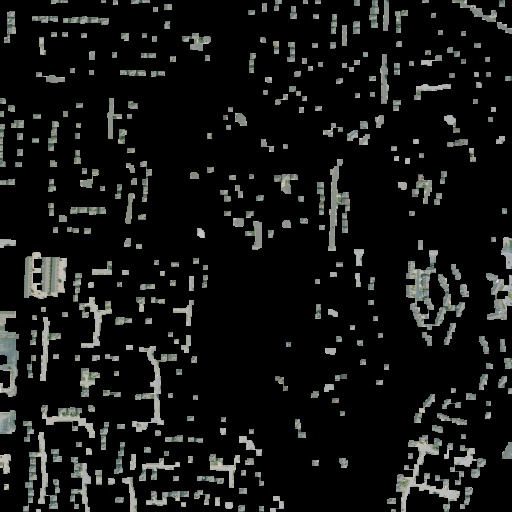

In [47]:
import cv2
import numpy as np
import time
import os
import pandas as pd
from IPython.display import Image, display  # For displaying images in Jupyter
import re

def preprocess_image(image_path):
    """
    Load and preprocess the aerial image
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Could not load image")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    scale_factor = 0.5
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    image_resized = cv2.resize(image_rgb, new_size, interpolation=cv2.INTER_AREA)
    return image_resized

def segment_buildings(image):
    """
    Segment potential building areas using color and edge detection
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_building = np.array([0, 0, 50])    
    upper_building = np.array([180, 50, 200])
    mask = cv2.inRange(hsv, lower_building, upper_building)
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

def count_buildings(mask, min_area=75):
    """
    Count buildings based on contours in the segmented mask
    """
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    building_count = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
            if len(approx) >= 4:
                building_count += 1
    return building_count

def process_image(image_path):
    """
    Process a single image and return building count (no display)
    """
    try:
        start_time = time.time()
        image = preprocess_image(image_path)
        mask = segment_buildings(image)
        building_count = count_buildings(mask)
        execution_time = time.time() - start_time
        return building_count, execution_time
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return 0, 0  # Return 0 buildings if error occurs

def process_all_images(data_folder):
    """
    Process all images in the data folder and save results to CSV
    """
    # List to store results
    results = []
    
    # Regex pattern to extract row and col from filename
    pattern = r'gee_image_row(\d+)_col(\d+)\.png'
    
    # Iterate through all files in the data folder
    for filename in os.listdir(data_folder):
        if filename.endswith('.png'):
            # Extract row and col from filename
            match = re.match(pattern, filename)
            if match:
                row = int(match.group(1))
                col = int(match.group(2))
                
                # Full path to image
                image_path = os.path.join(data_folder, filename)
                
                # Process image
                building_count, _ = process_image(image_path)
                
                # Store result
                results.append({
                    'image_name': filename,
                    'row': row,
                    'col': col,
                    'building_count': building_count
                })
            else:
                print(f"Skipping {filename}: does not match expected naming pattern")
    
    # Create DataFrame and save to CSV
    df = pd.DataFrame(results)
    output_csv = 'building_counts.csv'
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")
    
    # Display the DataFrame in Jupyter
    display(df)
    
    return df

# # Specify your data folder here
# data_folder = "data"  # Replace with your actual data folder path

# # Run the processing for all images
# df_results = process_all_images(data_folder)

# # Optional: Process and display a single image (your original request)
# single_image_path = "data/gee_image_row0_col25.png"
# try:
#     start_time = time.time()
#     image = preprocess_image(single_image_path)
#     mask = segment_buildings(image)
#     building_count = count_buildings(mask)
#     execution_time = time.time() - start_time
#     mask_colored = cv2.bitwise_and(image, image, mask=mask)
#     output_path = "output_segmented.jpg"
#     cv2.imwrite(output_path, cv2.cvtColor(mask_colored, cv2.COLOR_RGB2BGR))
#     print(f"Single image - Number of buildings detected: {building_count}")
#     print(f"Single image - Execution time: {execution_time:.2f} seconds")
#     print(f"Single image - Segmented image saved as: {output_path}")
#     display(Image(filename=output_path))
# except Exception as e:
#     print(f"Error: {str(e)}")